In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('../../../data/abalone.csv')

In [21]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x=='M' else (-1 if x == 'F' else 0))

In [23]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
train, y = data.drop('Rings', axis=1), data['Rings']

### Not Paralleled

In [25]:
%%time
SEED = 1
n_estimators = 50
cv = KFold(shuffle=True, random_state=SEED)
scores = []
for i in range(1, n_estimators+1):
    rf = RandomForestRegressor(n_estimators=i, random_state=SEED)
    score = cross_val_score(rf, train, y, cv=cv, scoring='r2')
    scores.append(score)

CPU times: user 1min 7s, sys: 435 ms, total: 1min 7s
Wall time: 1min 7s


### Paralleled

In [37]:
%%time
SEED = 1
n_estimators = 50
cv = KFold(shuffle=True, random_state=SEED)
scores = []
for i in range(1, n_estimators+1):
    rf = RandomForestRegressor(n_estimators=i, random_state=SEED, n_jobs=-1)
    score = cross_val_score(rf, train, y, cv=cv, scoring='r2')
    scores.append(score)

CPU times: user 9.96 s, sys: 2.31 s, total: 12.3 s
Wall time: 34.1 s


In [38]:
scores[0].mean()

0.10967482068860261

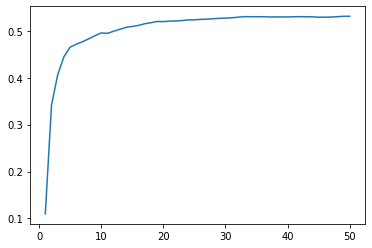

In [39]:
xx = [i for i in range(1, 51)]
plt.plot(xx, np.mean(scores, axis=1))

In [41]:
%%time
SEED = 1
n_estimators = 50
cv = KFold(shuffle=True, random_state=SEED)
score = 0
i = 1
while score < 0.52:
    rf = RandomForestRegressor(n_estimators=i, random_state=SEED, n_jobs=-1)
    score = cross_val_score(rf, train, y, cv=cv, scoring='r2').mean()
    i += 1

print('estimators: ', i)

estimators:  22
CPU times: user 2.25 s, sys: 439 ms, total: 2.69 s
Wall time: 6.9 s
